# Обработка результатов вычислений, построение графиков спуска к минимуму для разных p


In [1]:
all_plt = []
k = 0
with open('acds1000.txt') as f:
    
    for line in f:
        #plt_cur = []
        line = line.replace('[','').replace(']', '').strip()
        line = line.split() # to deal with blank 
        if line:            # lines (ie skip them)
            
            line = [float(i) for i in line]
            il = 0
            for i in line:
                if k == 0: all_plt.append([])
                all_plt[il].append(i)
                il = il + 1
                
        k = k + 1

In [2]:
# Prox-function 
# z should be a vector, not a matrix (use np.ravel() to convert)
def d(z, a):
    norm_z = np.linalg.norm(z, a)
    return 1/ 2 / (a - 1) * norm_z* norm_z

#Gradient of prox-function 
def grad_d(z, a):
    g = np.zeros(n).reshape(n, 1)
    norm_z = np.linalg.norm(np.ravel(z), a)
    nzz = 1/ (a - 1)*pow(norm_z, 2 - a)
    for k in range(0, n):
        g[k] = nzz * pow(abs(z[k]), a - 1)
        
    return g

In [3]:
import math
import numpy as np

n = int(1e3)
p = 1 + 1 / (2 * math.log(n))
q = p / (p - 1)

x_star = np.zeros(n).reshape(n, 1);
x_star[0] = 1;

#Initial point
x0 = np.zeros(n).reshape(n, 1);
x0[n-1] = 1;

L = 1

Vx01 = d(np.ravel(x_star), p) - d(np.ravel(x0), p) - grad_d(x0, p).T.dot(x_star - x0)
C_const1 = math.sqrt(3) * min([2*q - 1, 32* math.log(n) - 8]) * pow(n, 2/q + 1)

<IPython.core.display.Javascript object>


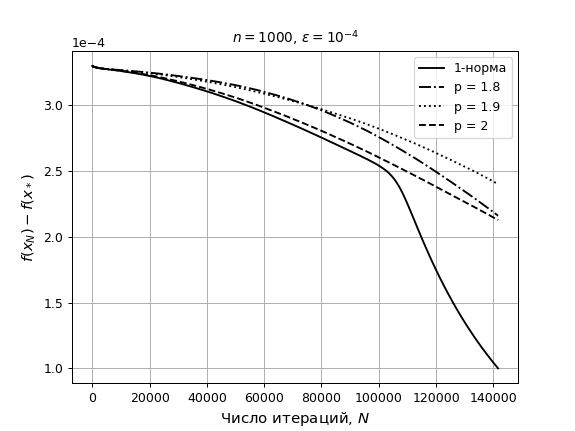

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.grid(True)
color = 'black'
plt.plot(range(1, k+1), all_plt[0], label = '1-норма', linestyle = '-', color = color)
plt.plot(range(1, k+1), all_plt[1], label = 'p = 1.8', linestyle = '-.', color = color)
plt.plot(range(1, k+1), all_plt[2], label = 'p = 1.9', linestyle = ':', color = color)
plt.plot(range(1, k+1), all_plt[3], label = 'p = 2', linestyle = '--', color = color)

plt.xlabel(r"Число итераций, $N$", fontsize=12)
plt.ylabel(r"$f(x_N)- f(x_*) $", fontsize=12)
plt.title(r"$n = 1000, \, \varepsilon = 10^{-4}$", fontsize = 11);
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
plt.legend()

<b>Ниже тот же график, но дополнительно - ещё теоретическая оценка числа итераций (фиолетовая линия)</b>

<IPython.core.display.Javascript object>


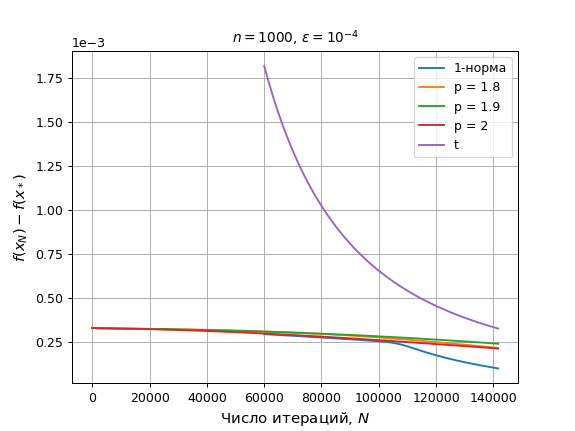

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(range(60000, k), [all_plt[0][i] for i in range(60000, k)], label = '1-норма')
plt.plot(range(1, k+1), all_plt[1], label = 'p = 1.8')
plt.plot(range(1, k+1), all_plt[2], label = 'p = 1.9')
plt.plot(range(1, k+1), all_plt[3], label = 'p = 2')

plt.plot(range(60000, k + 1), [4*int(Vx01)*C_const1*L/k/k for k in range(60000, k + 1)], label='t')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel(r"Число итераций, $N$", fontsize=12)
plt.ylabel(r"$f(x_N)- f(x_*) $", fontsize=12)
plt.title(r"$n = 1000, \, \varepsilon = 10^{-4}$", fontsize = 11);
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
plt.legend()